In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2


In [3]:
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
conn = psycopg2.connect(database = 'ports', user = 'docker', password = 'docker', 
                        host = 'localhost', port = '54320')
cur = conn.cursor()


In [60]:
# Data from local
test = pd.read_csv('test.csv')
test = test[test['month'] > '2017-08-16']
test.sort_values(['month'], ascending = True).head()
dropColumns = ['id', 'modificationdate','creationdate']
test.drop(dropColumns, axis =1 , inplace = True)
allCompanyIdList = test.company_id.unique()
monthList = test.month.unique()
test = test.sort_values('month')

In [62]:
test.head()

company_id  repair_days  repair_days_per_day       month
0          4972            0             0.000000  2018-01-02
544        6772           31             1.000000  2018-01-02
545        6776            0             0.000000  2018-01-02
546        6777           18             0.580645  2018-01-02
547        6778            9             0.290323  2018-01-02

In [76]:
test.groupby(['company_id','repair_days']).size().to_frame('size').reset_index().sort_values(['repair_days']).ascending()

company_id  repair_days  size
0           4972            0    20
834         5252            0     9
3927        6346            0    19
3885        6288            0    10
3867        6274            0    20
...          ...          ...   ...
1353        5426          490     1
650         5219          497     1
1354        5426          501     1
651         5219          502     1
952         5289          524     1

[7082 rows x 3 columns]

In [61]:
def prepareData(zeroLevel, allCompanyIdList, dataSet):
    testDictCompany = {}
    newCompanyIdList = allCompanyIdList.copy()
    for companyId in allCompanyIdList:
        testDictCompany[companyId] = dataSet.loc[dataSet['company_id'] == companyId]
        if len(testDictCompany[companyId][testDictCompany[companyId]['repair_days']>0]) < zeroLevel:
            newCompanyIdList = np.delete(newCompanyIdList,np.where(newCompanyIdList == companyId)[0])
    return testDictCompany, newCompanyIdList

def calculateMeanValue(monthList, meanValueAccordingToDate, dataSet):
    testDictDate = {}
    for date in monthList:
        testDictDate[date] = dataSet.loc[dataSet['month'] == date]
        meanValueAccordingToDate = meanValueAccordingToDate.append({
                                    'repair_days' : testDictDate[date]['repair_days'].mean(), 
                                     'repair_days_per_day' : testDictDate[date]['repair_days_per_day'].mean(),
                                     'month' : date}, ignore_index=True)
    return meanValueAccordingToDate, testDictDate

In [14]:
testDictCompany = {}
testDictDate = {}

testDictCompany1, companyIdList1 = prepareData(0, allCompanyIdList, test)

meanValueAccordingToDate1 = pd.DataFrame(columns = ['repair_days', 'repair_days_per_day', 'month'])
meanValueAccordingToDate1, testDictDate1 = calculateMeanValue(monthList, meanValueAccordingToDate1, 
                                                            test[test['company_id'].isin(companyIdList1)])

In [15]:
len(companyIdList1)

825

In [63]:
testDictCompany1

{4972:        company_id  repair_days  repair_days_per_day       month
 0            4972            0                  0.0  2018-01-02
 825          4972            0                  0.0  2018-02-02
 1651         4972            0                  0.0  2018-03-02
 2475         4972            0                  0.0  2018-04-02
 3300         4972            0                  0.0  2018-05-02
 4125         4972            0                  0.0  2018-06-02
 4950         4972            0                  0.0  2018-07-02
 5775         4972            0                  0.0  2018-08-02
 6600         4972            0                  0.0  2018-09-02
 7425         4972            0                  0.0  2018-10-02
 8250         4972            0                  0.0  2018-11-02
 9075         4972            0                  0.0  2018-12-02
 9900         4972            0                  0.0  2019-01-02
 10725        4972            0                  0.0  2019-02-02
 11550        4972 

([<matplotlib.axis.XTick at 0x7f8b9c5dcac8>],
 <a list of 1 Text xticklabel objects>)

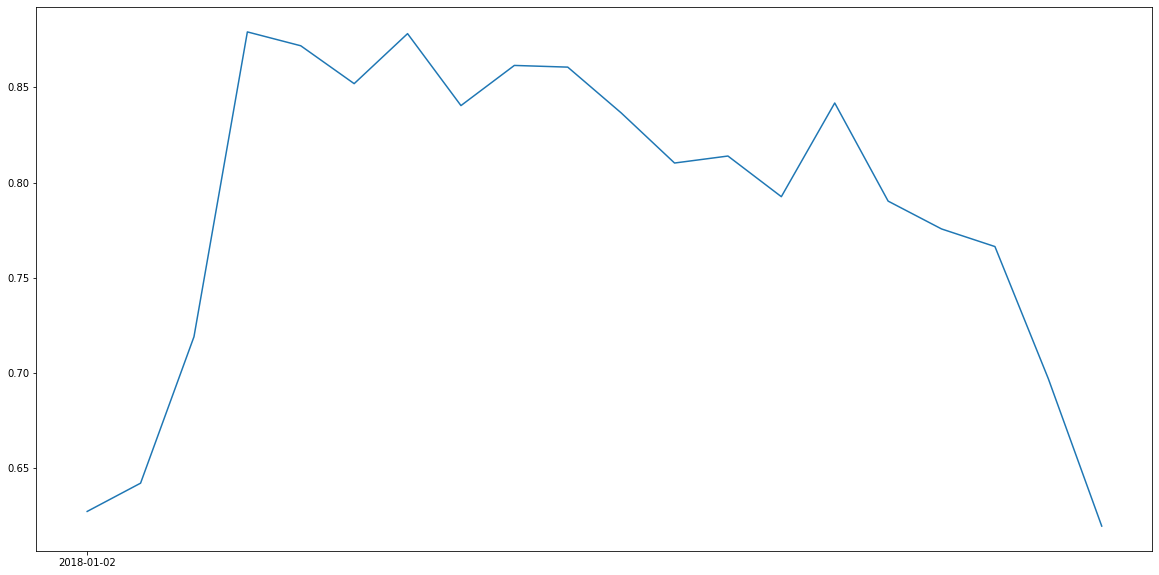

In [16]:
meanValueAccordingToDate1 = meanValueAccordingToDate1.sort_values('month')
xtick = meanValueAccordingToDate1['month'].copy()
plt.figure()
plt.plot(meanValueAccordingToDate1['month'], meanValueAccordingToDate1['repair_days_per_day'])
plt.xticks(xtick.iloc[::20], visible = True)
    

<BarContainer object of 20 artists>

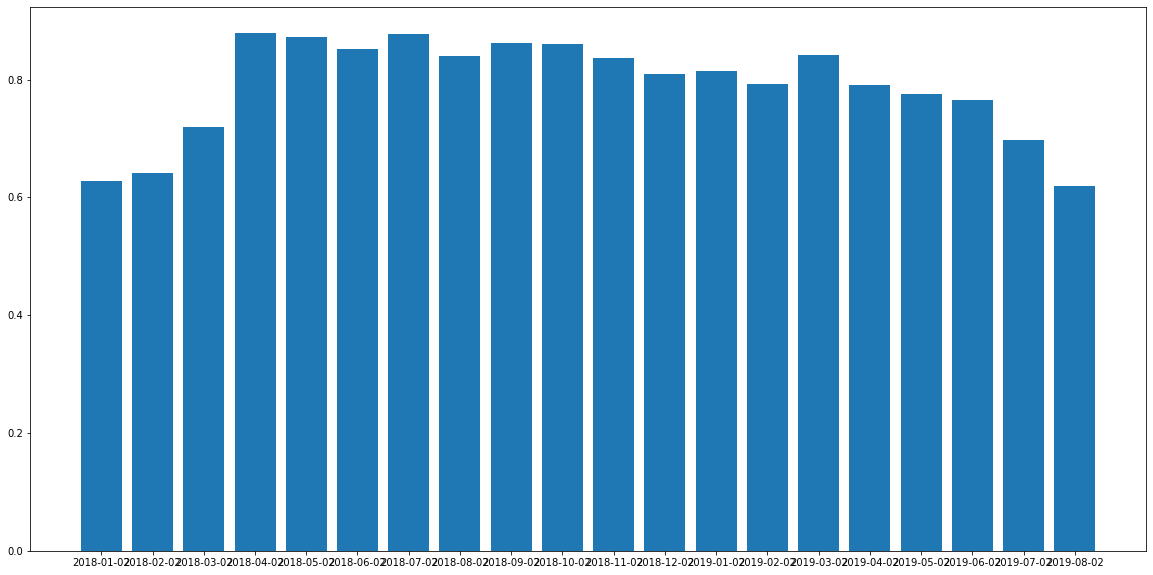

In [18]:
plt.bar(meanValueAccordingToDate1['month'], meanValueAccordingToDate1['repair_days_per_day'])

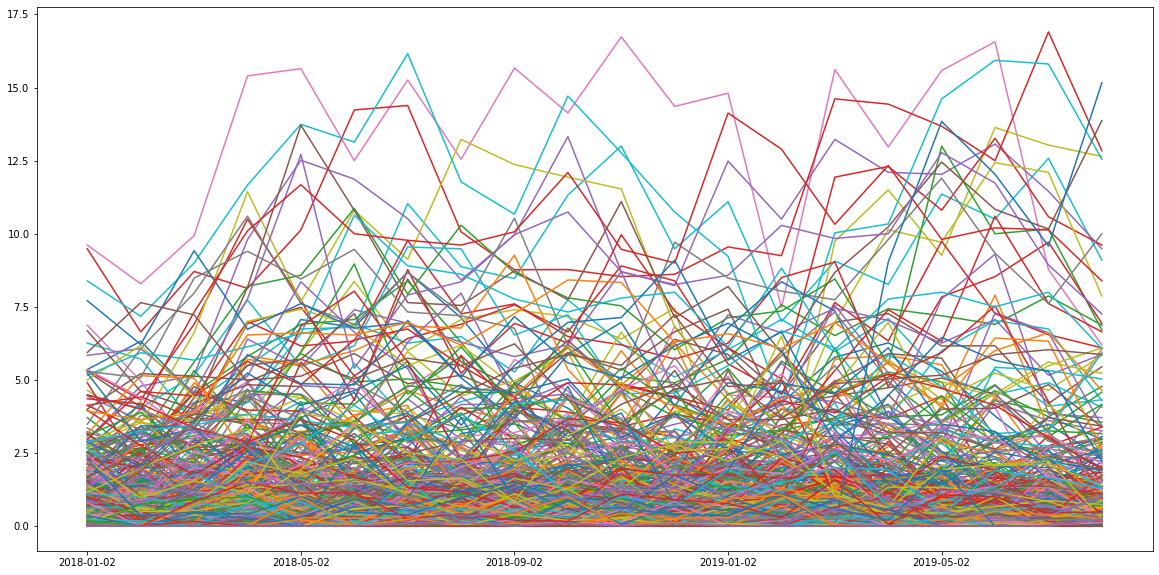

In [17]:
my_colors = plt.rcParams['axes.prop_cycle']()
plt.figure()
for companyId in companyIdList1:
    plt.plot(testDictCompany1[companyId]['month'], testDictCompany1[companyId]['repair_days_per_day'])
    plt.xticks(xtick.iloc[::4], visible = True)
    

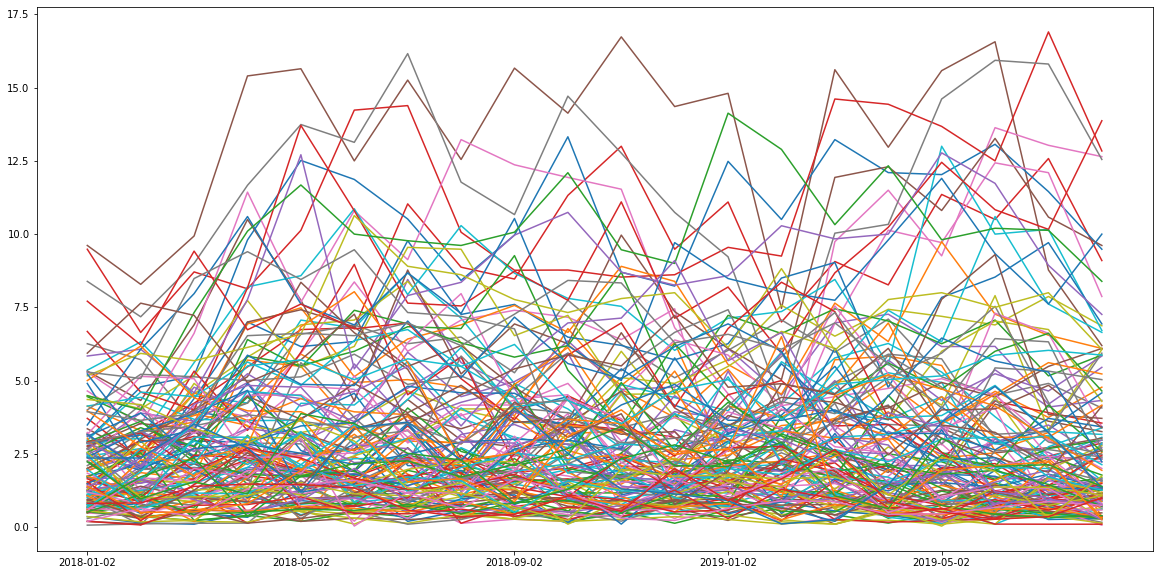

In [19]:
testDictCompany2, companyIdList2 = prepareData(len(monthList), allCompanyIdList, test)
meanValueAccordingToDate2 = pd.DataFrame(columns = ['repair_days', 'repair_days_per_day', 'month'])
meanValueAccordingToDate2, testDictDate2 = calculateMeanValue(monthList, meanValueAccordingToDate2, 
                                                            test[test['company_id'].isin(companyIdList2)])
my_colors = plt.rcParams['axes.prop_cycle']()
plt.figure()
for companyId in companyIdList2:
    plt.plot(testDictCompany2[companyId]['month'], testDictCompany2[companyId]['repair_days_per_day'])
    plt.xticks(xtick.iloc[::4], visible = True)

In [50]:
companyIdList2

array([ 5034,  5035,  5040,  5055,  5112,  5118,  5121,  5123,  5126,
        5127,  5165,  5171,  5175,  5197,  5218,  5219,  5223,  5224,
        5227,  5228,  5230,  5234,  5256,  5289,  5342,  5349,  5375,
        5426,  5431,  5434,  5437,  5465,  5467,  5468,  5489,  5504,
        5510,  5517,  5545,  5548,  5602,  5679,  5749,  5804,  5830,
        5848,  5871,  5872,  5876,  5877,  5889,  5896,  5922,  5928,
        5934,  5945,  5955,  5966,  5967,  5981,  5997,  6035,  6037,
        6078,  6133,  6146,  6241,  6255,  6265,  6267,  6269,  6287,
        6312,  6340,  6362,  6404,  6429,  6508,  6578,  6580,  6592,
        6593,  6618,  6642,  6644,  6657,  6669,  6686,  6693,  6704,
        6714,  6739,  6747,  6749,  6768,  6769,  6777,  6778,  6788,
        6790,  6800,  6805,  6809,  6812,  6829,  6831,  6832,  6834,
        6836,  6837,  6863,  6900,  6901,  6918,  6949,  7066,  7109,
        7179,  7369,  7370,  7380,  7383,  7384,  7393,  7444,  7640,
        7669,  7675,

([<matplotlib.axis.XTick at 0x7f8b98a7eeb8>],
 <a list of 1 Text xticklabel objects>)

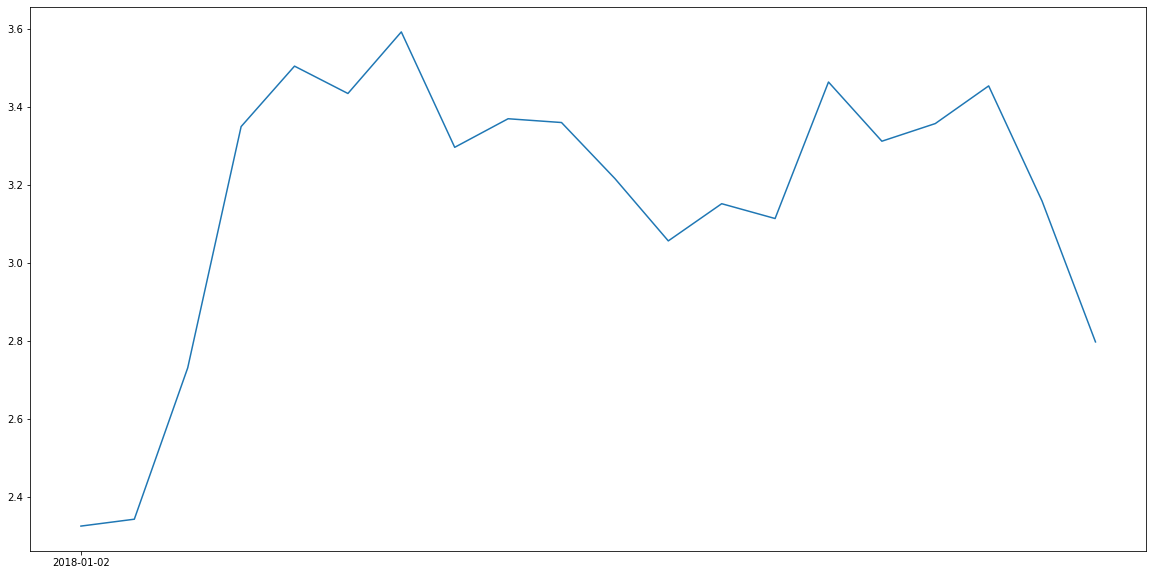

In [21]:
meanValueAccordingToDate2 = meanValueAccordingToDate2.sort_values('month')
xtick = meanValueAccordingToDate2['month'].copy()
plt.figure()
plt.plot(meanValueAccordingToDate2['month'], meanValueAccordingToDate2['repair_days_per_day'])
plt.xticks(xtick.iloc[::20], visible = True)
    

In [22]:
summaryOfData = pd.DataFrame(columns = ['companyId', 'repairDaysMean', 'repairDaysVar'])
for companyId in companyIdList2:
    summaryOfData = summaryOfData.append({'companyId': companyId, 
                                         'repairDaysMean': testDictCompany2[companyId]['repair_days'].mean(), 
                                         'repairDaysVar': testDictCompany2[companyId]['repair_days'].var()}, 
                                         ignore_index = True)

In [23]:
summaryOfData.describe()

companyId  repairDaysMean  repairDaysVar
count    144.000000      144.000000     144.000000
mean    6649.493056       96.427778    1855.986477
std     4079.112647       77.232502    2470.698757
min     5034.000000       12.050000      21.410526
25%     5508.500000       42.412500     452.808553
50%     6299.500000       70.125000     990.909211
75%     6834.500000      126.437500    2032.587500
max    54203.000000      393.100000   15863.039474

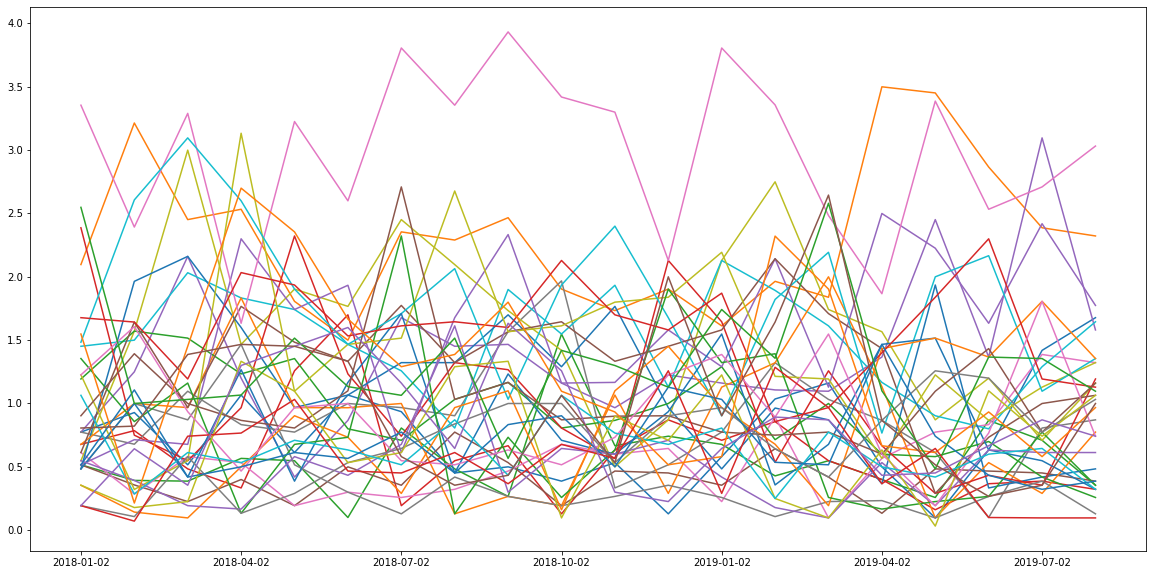

In [49]:
lowVarData = summaryOfData[summaryOfData['repairDaysVar'] < 452]
newCompanyIdList = lowVarData['companyId'] 

testDictCompany3, companyIdList3 = prepareData(len(monthList), newCompanyIdList, test)
meanValueAccordingToDate3 = pd.DataFrame(columns = ['repair_days', 'repair_days_per_day', 'month'])
meanValueAccordingToDate3, testDictDate3 = calculateMeanValue(monthList, meanValueAccordingToDate3, 
                                                            test[test['company_id'].isin(companyIdList3)])
my_colors = plt.rcParams['axes.prop_cycle']()
plt.figure()
for companyId in companyIdList3:
    plt.plot(testDictCompany3[companyId]['month'], testDictCompany3[companyId]['repair_days_per_day'])
    plt.xticks(xtick.iloc[::3], visible = True)

In [43]:
companyIdList3

2       5040.0
7       5123.0
8       5126.0
10      5165.0
19      5228.0
22      5256.0
35      5504.0
39      5548.0
42      5749.0
44      5830.0
45      5848.0
46      5871.0
48      5876.0
51      5896.0
52      5922.0
53      5928.0
55      5945.0
58      5967.0
62      6037.0
63      6078.0
65      6146.0
70      6269.0
83      6642.0
84      6644.0
88      6693.0
95      6769.0
114     6949.0
115     7066.0
118     7369.0
121     7383.0
122     7384.0
123     7393.0
128     7701.0
133     7728.0
136     7752.0
143    54203.0
Name: companyId, dtype: float64

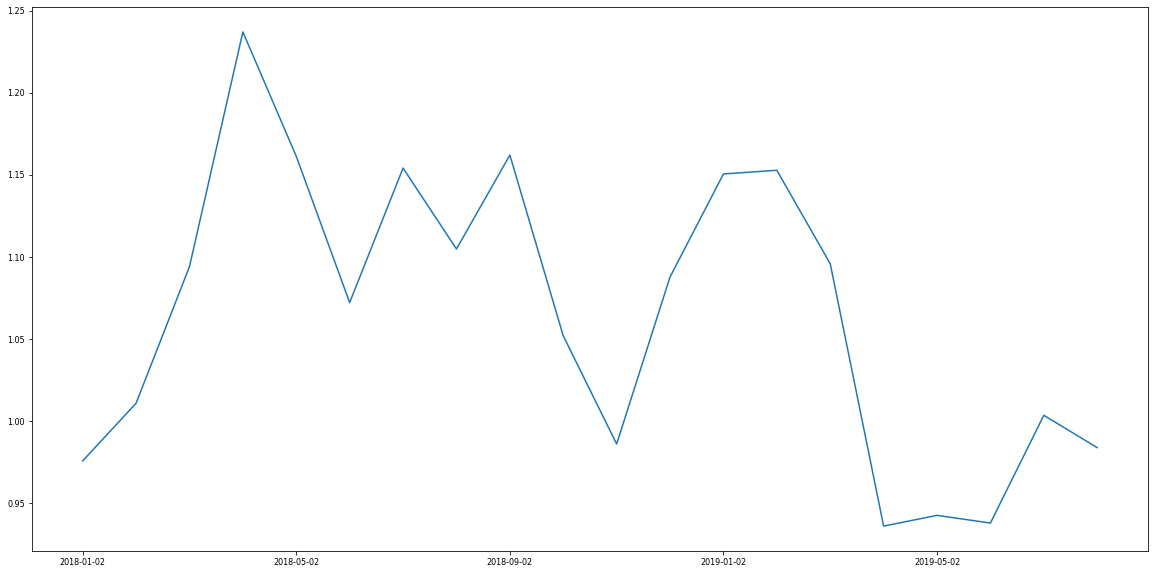

In [40]:
meanValueAccordingToDate3 = meanValueAccordingToDate3.sort_values('month')
xtick = meanValueAccordingToDate3['month'].copy()
myPlt = plt.figure()
ax = myPlt.add_subplot(111)
line, = ax.plot(meanValueAccordingToDate3['month'], meanValueAccordingToDate3['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)
ax.tick_params(labelsize = 8)

([<matplotlib.axis.XTick at 0x7f8b987a5400>,
 <a list of 5 Text xticklabel objects>)

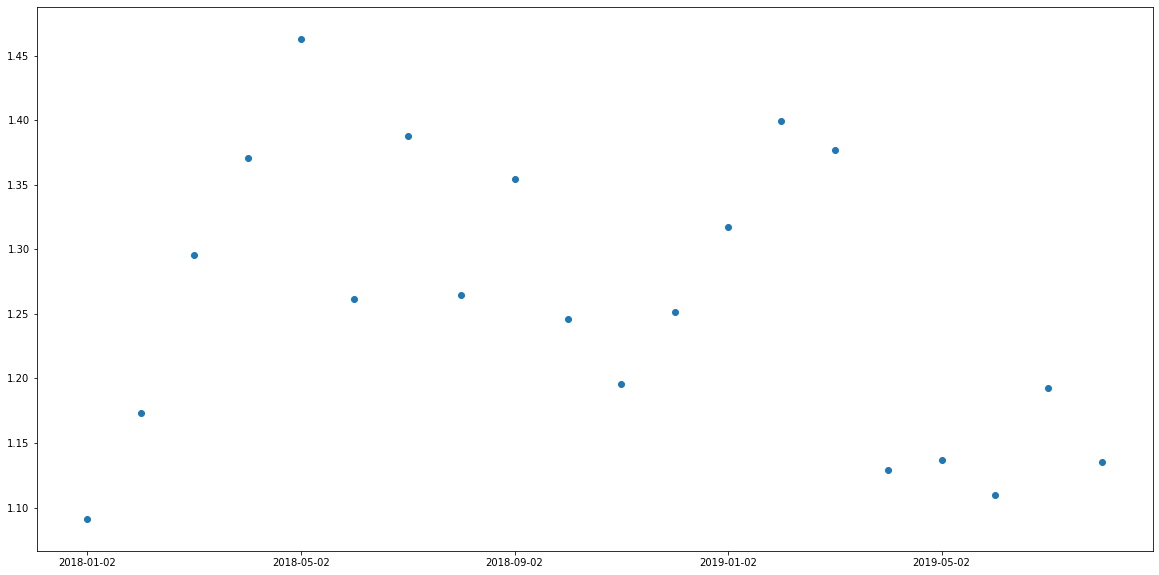

In [27]:
plt.scatter(meanValueAccordingToDate3['month'], meanValueAccordingToDate3['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)

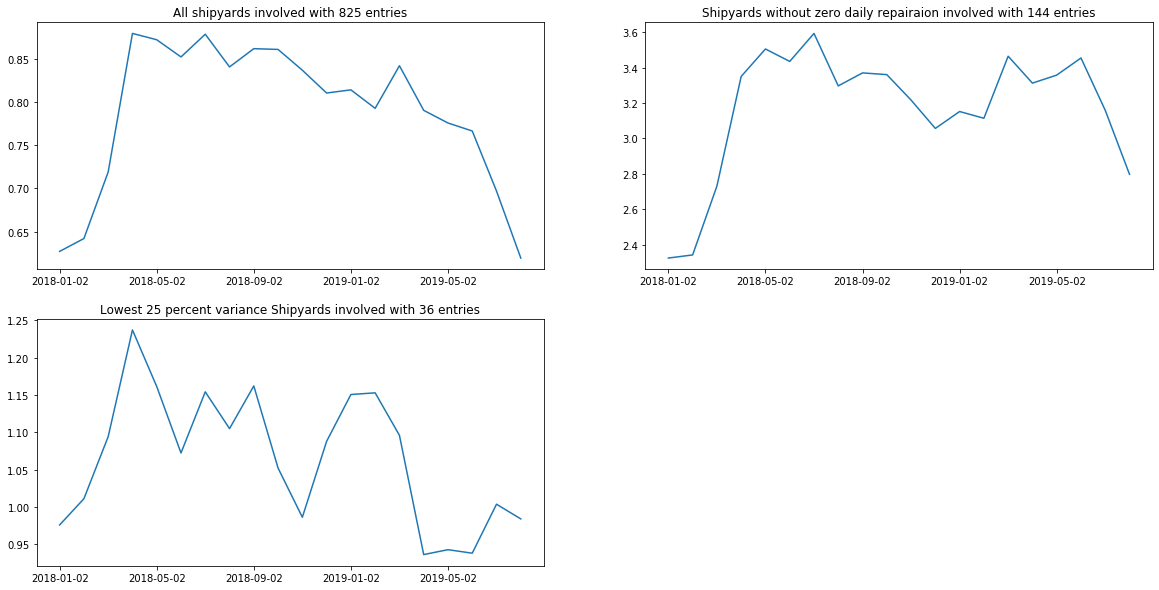

In [51]:
figureAllTogether = plt.figure()
ax1 = figureAllTogether.add_subplot(221)
line1, = ax1.plot(meanValueAccordingToDate1['month'], meanValueAccordingToDate1['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)
ax1.set_title("All shipyards involved with %s"%len(companyIdList1)+" entries")
ax1.tick_params(labelsize = 10)
ax2 = figureAllTogether.add_subplot(222)
line2, = ax2.plot(meanValueAccordingToDate2['month'], meanValueAccordingToDate2['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)
ax2.set_title("Shipyards without zero daily repairaion involved with %s"%len(companyIdList2)+" entries")
ax2.tick_params(labelsize = 10)
ax3 = figureAllTogether.add_subplot(223)
line3, = ax3.plot(meanValueAccordingToDate3['month'], meanValueAccordingToDate3['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)
ax3.set_title("Lowest 25 percent variance Shipyards involved with %s"%len(companyIdList3)+" entries")
ax3.tick_params(labelsize = 10)


In [42]:
companyIdArray = companyIdList3.values
print(companyIdArray)
print(len(companyIdArray))

[ 5040.  5123.  5126.  5165.  5228.  5256.  5504.  5548.  5749.  5830.
  5848.  5871.  5876.  5896.  5922.  5928.  5945.  5967.  6037.  6078.
  6146.  6269.  6642.  6644.  6693.  6769.  6949.  7066.  7369.  7383.
  7384.  7393.  7701.  7728.  7752. 54203.]
36


In [47]:
companyIdList3.values

array([ 5040.,  5123.,  5126.,  5165.,  5228.,  5256.,  5504.,  5548.,
        5749.,  5830.,  5848.,  5871.,  5876.,  5896.,  5922.,  5928.,
        5945.,  5967.,  6037.,  6078.,  6146.,  6269.,  6642.,  6644.,
        6693.,  6769.,  6949.,  7066.,  7369.,  7383.,  7384.,  7393.,
        7701.,  7728.,  7752., 54203.])

([<matplotlib.axis.XTick at 0x7f8b93d11668>,
 <a list of 5 Text xticklabel objects>)

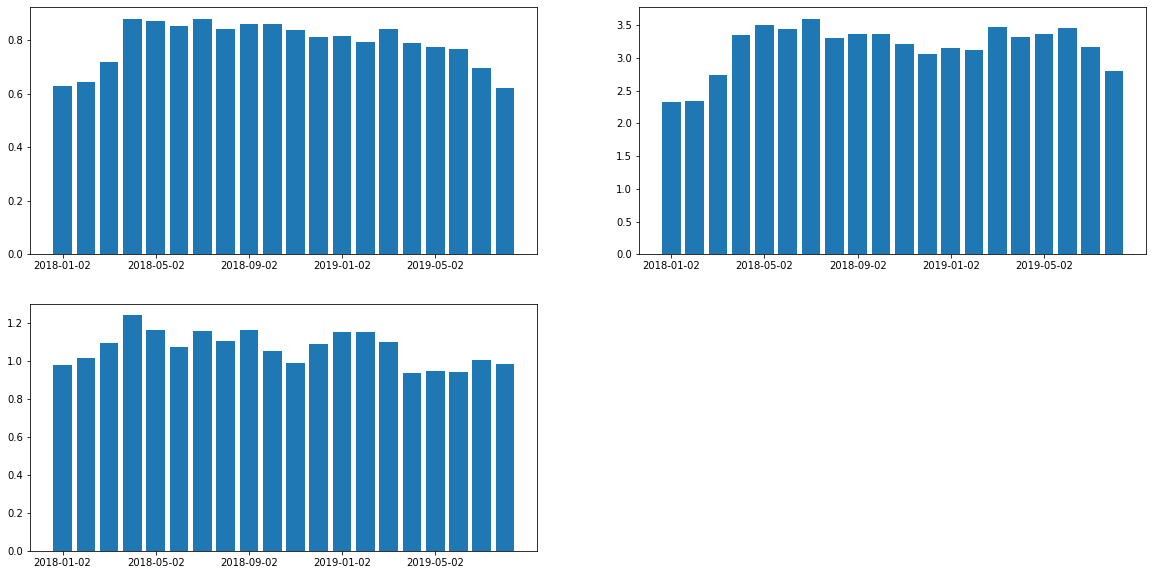

In [52]:
figureAllTogether = plt.figure()
ax1 = figureAllTogether.add_subplot(221)
ax1.bar(meanValueAccordingToDate1['month'], meanValueAccordingToDate1['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)
ax2 = figureAllTogether.add_subplot(222)
ax2.bar(meanValueAccordingToDate2['month'], meanValueAccordingToDate2['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)
ax3 = figureAllTogether.add_subplot(223)
ax3.bar(meanValueAccordingToDate3['month'], meanValueAccordingToDate3['repair_days_per_day'])
plt.xticks(xtick.iloc[::4], visible = True)

In [ ]:
conn = psycopg2.connect(database = 'ports', user = 'docker', password = 'docker', 
                        host = 'localhost', port = '54320')
cur = conn.cursor()


In [53]:
cur.execute("select length from vessels where servicestatus like 'IN SERVICE/COMMISSION' and length is not null and length > 0 and imo is not null and deleted = false" )
repairDays = cur.fetchall()
print(repairDays)


[(Decimal('274'),), (Decimal('26'),), (Decimal('30'),), (Decimal('26'),), (Decimal('57'),), (Decimal('200'),), (Decimal('29'),), (Decimal('31'),), (Decimal('199'),), (Decimal('53'),), (Decimal('55'),), (Decimal('32'),), (Decimal('333'),), (Decimal('31'),), (Decimal('224'),), (Decimal('46'),), (Decimal('92'),), (Decimal('199'),), (Decimal('291'),), (Decimal('400'),), (Decimal('24'),), (Decimal('299'),), (Decimal('43'),), (Decimal('35'),), (Decimal('22'),), (Decimal('225'),), (Decimal('36'),), (Decimal('36'),), (Decimal('38'),), (Decimal('195'),), (Decimal('41'),), (Decimal('22'),), (Decimal('60'),), (Decimal('59'),), (Decimal('46'),), (Decimal('71'),), (Decimal('200'),), (Decimal('32'),), (Decimal('138'),), (Decimal('208'),), (Decimal('199'),), (Decimal('228'),), (Decimal('169'),), (Decimal('163'),), (Decimal('153'),), (Decimal('72'),), (Decimal('82'),), (Decimal('35'),), (Decimal('159'),), (Decimal('54'),), (Decimal('35'),), (Decimal('70'),), (Decimal('32'),), (Decimal('76'),), (Decima

In [56]:
test = pd.DataFrame(list(repairDays))

In [57]:
test[0].astype(float).describe()

count    110752.000000
mean        101.125641
std          78.904815
min           1.000000
25%          38.000000
50%          72.000000
75%         145.250000
max         429.000000
Name: 0, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b9c2c68d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b9c2c6f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b9c2c64a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b9988e630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b9988e978>],
 'means': []}

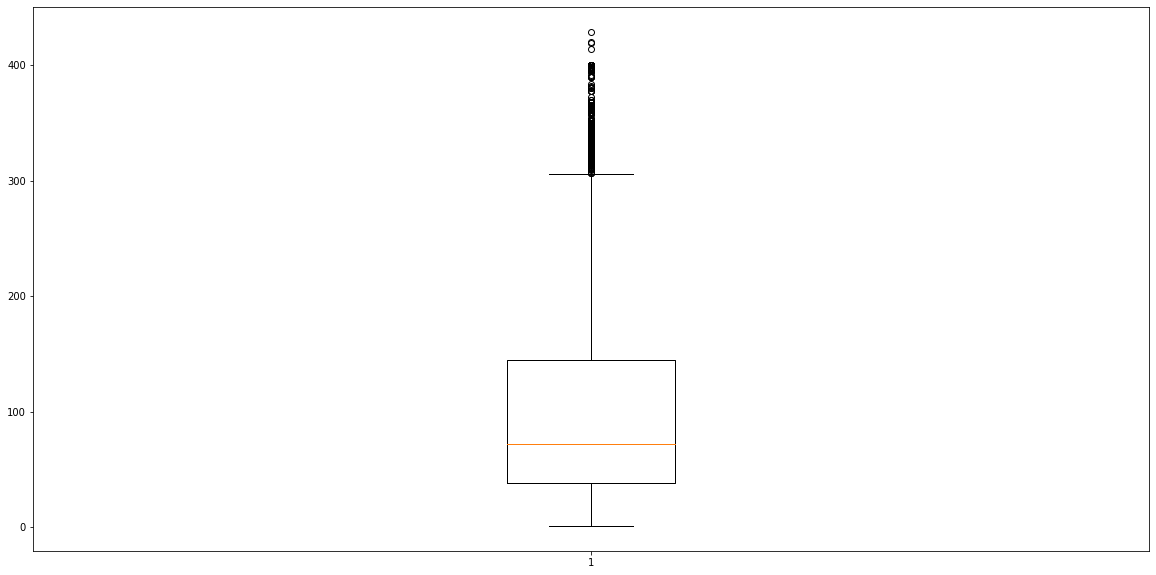

In [58]:
plt.boxplot(test[0].astype(float))

In [ ]:
for companyId in allCompanyIdList:
    